# Agrupamiento en Aprendizaje No Supervisado

## Introducción al Clustering

### Teoría
El agrupamiento (*clustering*) es una técnica de aprendizaje no supervisado que permite encontrar grupos de objetos similares, donde los objetos dentro de un mismo grupo están más relacionados entre sí que con objetos de otros grupos. A diferencia del aprendizaje supervisado, en clustering **no tenemos etiquetas** predefinidas.

**Aplicaciones típicas**:
- Segmentación de clientes
- Agrupación de documentos por temas
- Sistemas de recomendación
- Análisis de imágenes

**Principales algoritmos**:
- **Basados en centroides**: $k-$*Means*
- **Basados en densidad**: DBSCAN
- **Jerárquicos**: Aglomerativo
- **Basados en grafos**: *Spectral Clustering*



## $k-$*Means* Clustering

### Teoría
$k-$*Means* es un algoritmo iterativo que minimiza la suma de distancias cuadradas entre cada punto y el centroide de su cluster:

**Algoritmo**:
1. Inicializar k centroides aleatoriamente
2. Asignar cada punto al centroide más cercano
3. Recalcular centroides como la media de los puntos asignados
4. Repetir pasos 2-3 hasta convergencia

**Función objetivo (SSE - Sum of Squared Errors)**:
$$SSE = \sum_{i=1}^{n} \sum_{j=1}^{k} w^{(i,j)} ||x^{(i)} - \mu^{(j)}||^2$$
donde:
- $x^{(i)}$ es el punto i-ésimo
- $\mu^{(j)}$ es el centroide del cluster j
- $w^{(i,j)} = 1$ si $x^{(i)}$ pertenece al cluster j, 0 en otro caso

### Ejemplo

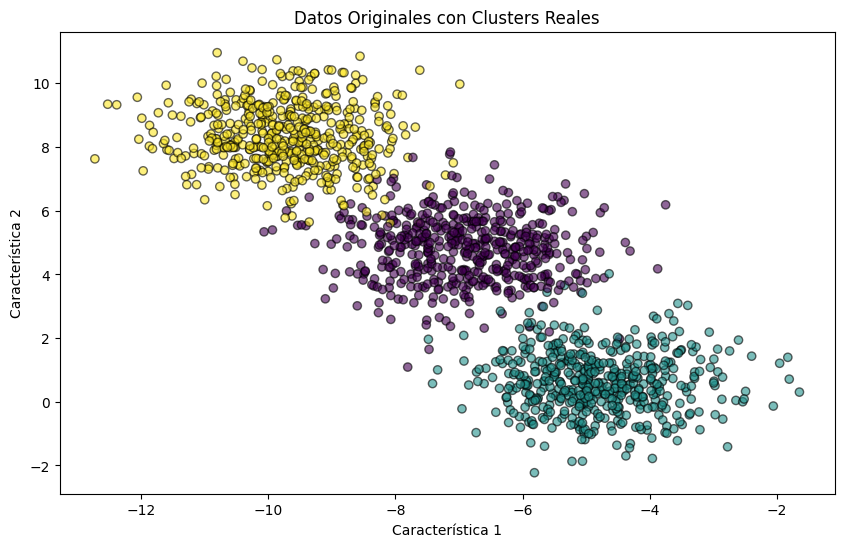

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generar datos sintéticos
n_samples = 1500
random_state = 12
X, y_true = make_blobs(n_samples=n_samples, 
                      centers=3,  # 3 clusters naturales
                      cluster_std=1.0,
                      random_state=random_state)

# Visualizar datos originales
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, alpha=0.6, edgecolors='k')
plt.title('Datos Originales con Clusters Reales')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

In [2]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=2023)
y_pred = kmeans.fit_predict(X)

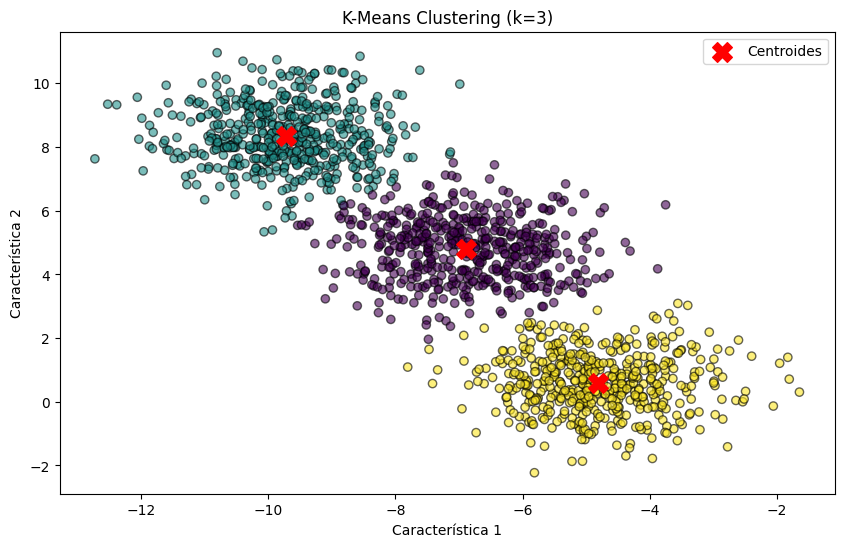

In [3]:
# Visualizar clusters encontrados
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.6, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], 
           kmeans.cluster_centers_[:, 1], 
           c='red', marker='X', s=200, label='Centroides')
plt.title('K-Means Clustering (k=3)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

In [4]:
# Métricas de evaluación
print(f"SSE (Inercia): {kmeans.inertia_:.2f}")
print(f"Número de iteraciones: {kmeans.n_iter_}")
print(f"Centroides:\n{kmeans.cluster_centers_}")

SSE (Inercia): 2834.81
Número de iteraciones: 5
Centroides:
[[-6.89294062  4.78170693]
 [-9.7241378   8.34368857]
 [-4.81054518  0.5971853 ]]


#### Explicación del Código

1. **`make_blobs`**: Genera datos sintéticos con distribución gaussiana
   - `centers`: Número de clusters naturales
   - `cluster_std`: Desviación estándar de los clusters
   - `random_state`: Semilla para reproducibilidad

2. **`KMeans`**: Implementa el algoritmo K-Means
   - `n_clusters`: Número de clusters (k) - parámetro crucial
   - `random_state`: Semilla para inicialización reproducible

3. **`fit_predict`**: Entrena el modelo y predice clusters en un solo paso

4. **Atributos importantes**:
   - `cluster_centers_`: Coordenadas de los centroides
   - `inertia_`: SSE (suma de distancias al cuadrado)
   - `labels_`: Etiquetas de cluster asignadas
   - `n_iter_`: Número de iteraciones hasta convergencia

#### Parámetros Clave de `KMeans`
- **`n_clusters`**: Número de clusters (k) - hiperparámetro más importante
- **`init`**: Método de inicialización ('k-means++', 'random')
- **`max_iter`**: Máximo número de iteraciones (default=300)
- **`tol`**: Tolerancia para criterio de convergencia
- **`n_init`**: Número de inicializaciones con diferentes semillas


## Método del Codo (*Elbow Method*)

### Teoría
El método del codo ayuda a determinar el número óptimo de clusters graficando la SSE contra diferentes valores de k. El punto donde la curva forma un "codo" indica el k óptimo.

### Ejemplo

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generar datos
X, _ = make_blobs(n_samples=1500, centers=4, random_state=2023)

# Calcular SSE para diferentes valores de k
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', 
                   max_iter=300, random_state=0, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


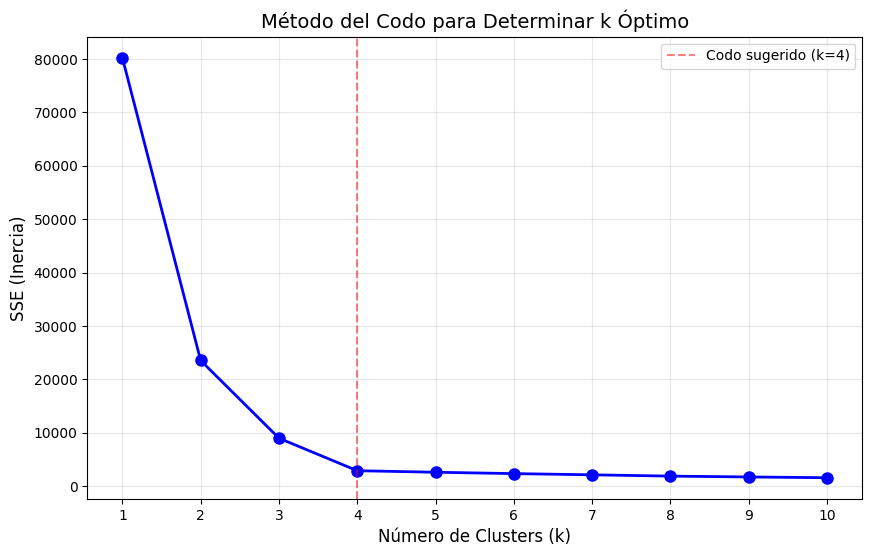

In [7]:
# Graficar método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('SSE (Inercia)', fontsize=12)
plt.title('Método del Codo para Determinar k Óptimo', fontsize=14)
plt.xticks(k_range)
plt.grid(True, alpha=0.3)

# Marcar el "codo" (generalmente en k=4 para estos datos)
plt.axvline(x=4, color='red', linestyle='--', alpha=0.5, label='Codo sugerido (k=4)')
plt.legend()
plt.show()

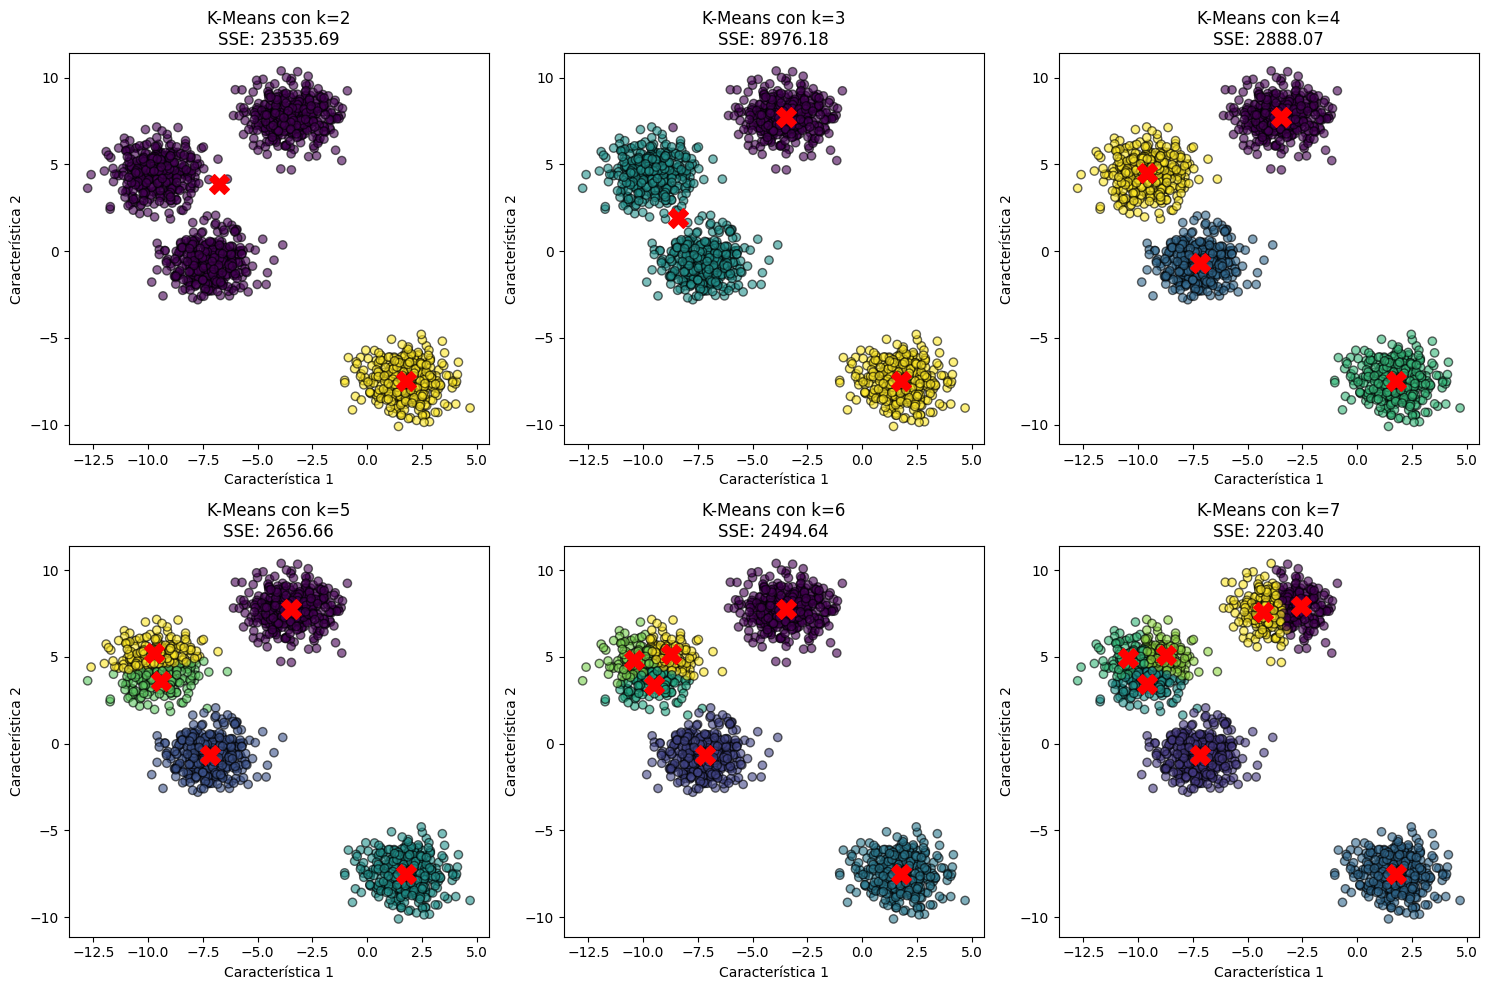

In [8]:
# Comparar clusters con diferentes valores de k
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, k in enumerate([2, 3, 4, 5, 6, 7]):
    kmeans = KMeans(n_clusters=k, random_state=2023)
    y_pred = kmeans.fit_predict(X)
    
    ax = axes[idx]
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.6, edgecolors='k')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
              c='red', marker='X', s=200)
    ax.set_title(f'K-Means con k={k}\nSSE: {kmeans.inertia_:.2f}')
    ax.set_xlabel('Característica 1')
    ax.set_ylabel('Característica 2')

plt.tight_layout()
plt.show()

#### Interpretación del Método del Codo
- **SSE alta con k pequeño**: Subdivisión insuficiente
- **SSE baja con k grande**: Posible sobre-división
- **Punto del codo**: Compromiso óptimo entre simplicidad y ajuste
- **Advertencia**: No siempre hay un codo claro; puede requerir criterio de experto

### Notas de Examen sobre K-Means
- **Ventajas**:
  - Simple y rápido para grandes datasets
  - Escala bien con el número de muestras
  - Fácil de interpretar

- **Desventajas**:
  - Requiere especificar k a priori
  - Sensible a inicialización (puede converger a óptimos locales)
  - Asume clusters esféricos y de tamaño similar
  - Sensible a outliers

- **Inicialización k-means++**:
  - Mejora la inicialización aleatoria
  - Distribuye centroides iniciales lejanos entre sí
  - Reduce número de iteraciones y mejora resultados

- **Complejidad computacional**:
  - O(n * k * d * i) donde:
    - n: número de muestras
    - k: número de clusters
    - d: número de dimensiones
    - i: número de iteraciones


## Dendrogramas y Clustering Jerárquico

### Teoría
El clustering jerárquico construye una jerarquía de clusters que puede visualizarse como un dendrograma. Existen dos enfoques:

1. **Aglomerativo** (*bottom-up*): Cada punto comienza como cluster individual y se fusionan progresivamente
2. **Divisivo** (*top-down*): Todos los puntos comienzan en un cluster que se divide progresivamente

**Métricas de distancia entre clusters**:
- **Single linkage**: Distancia mínima entre puntos
- **Complete linkage**: Distancia máxima entre puntos
- **Average linkage**: Distancia promedio entre puntos
- **Ward linkage**: Minimiza la varianza dentro de clusters

### Ejemplo

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

# Generar datos
X, y_true = make_blobs(n_samples=1500, centers=4, 
                       cluster_std=0.8, random_state=12)


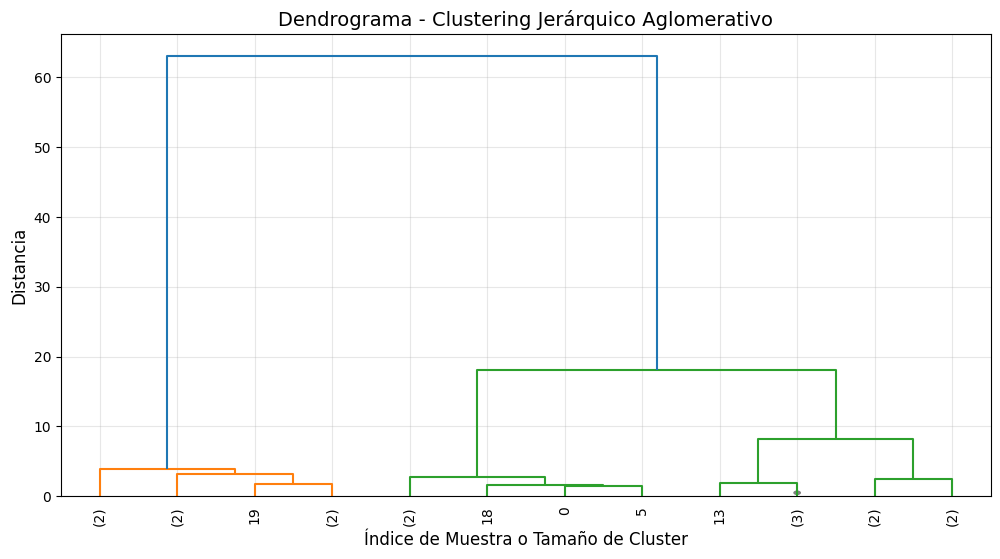

In [10]:
# Método 1: Usando scipy para dendrograma
plt.figure(figsize=(12, 6))
# Usar solo 20 muestras para visualización clara
Z = linkage(X[:20], method='ward')

# Crear dendrograma
dendrogram(Z, 
           truncate_mode='lastp',  # mostrar solo los últimos p clusters fusionados
           p=12,
           show_leaf_counts=True,
           leaf_rotation=90,
           leaf_font_size=10,
           show_contracted=True)

plt.title('Dendrograma - Clustering Jerárquico Aglomerativo', fontsize=14)
plt.xlabel('Índice de Muestra o Tamaño de Cluster', fontsize=12)
plt.ylabel('Distancia', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


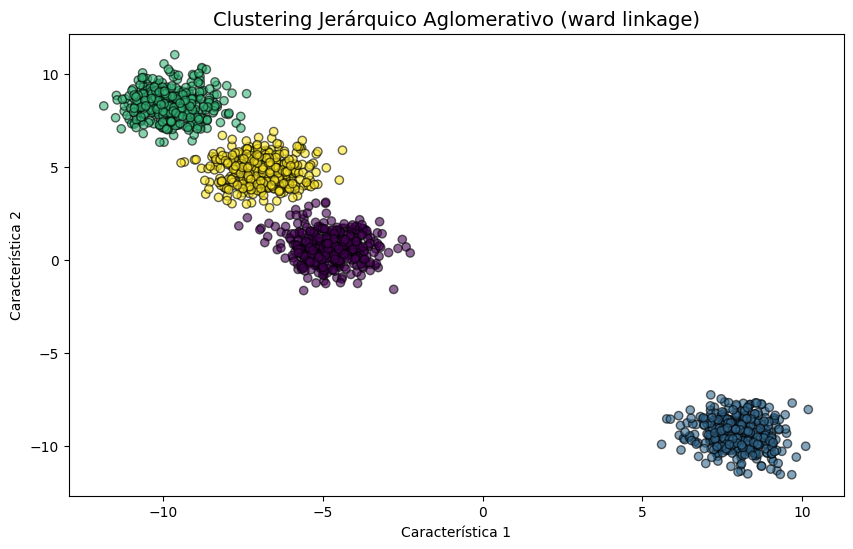

In [11]:
# Método 2: Usando sklearn para clustering completo
# Aplicar clustering jerárquico
agg_clustering = AgglomerativeClustering(
    n_clusters=4,  # cortar dendrograma en 4 clusters
    linkage='ward'  # método de enlace
)
y_pred = agg_clustering.fit_predict(X)

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.6, edgecolors='k')
plt.title('Clustering Jerárquico Aglomerativo (ward linkage)', fontsize=14)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()


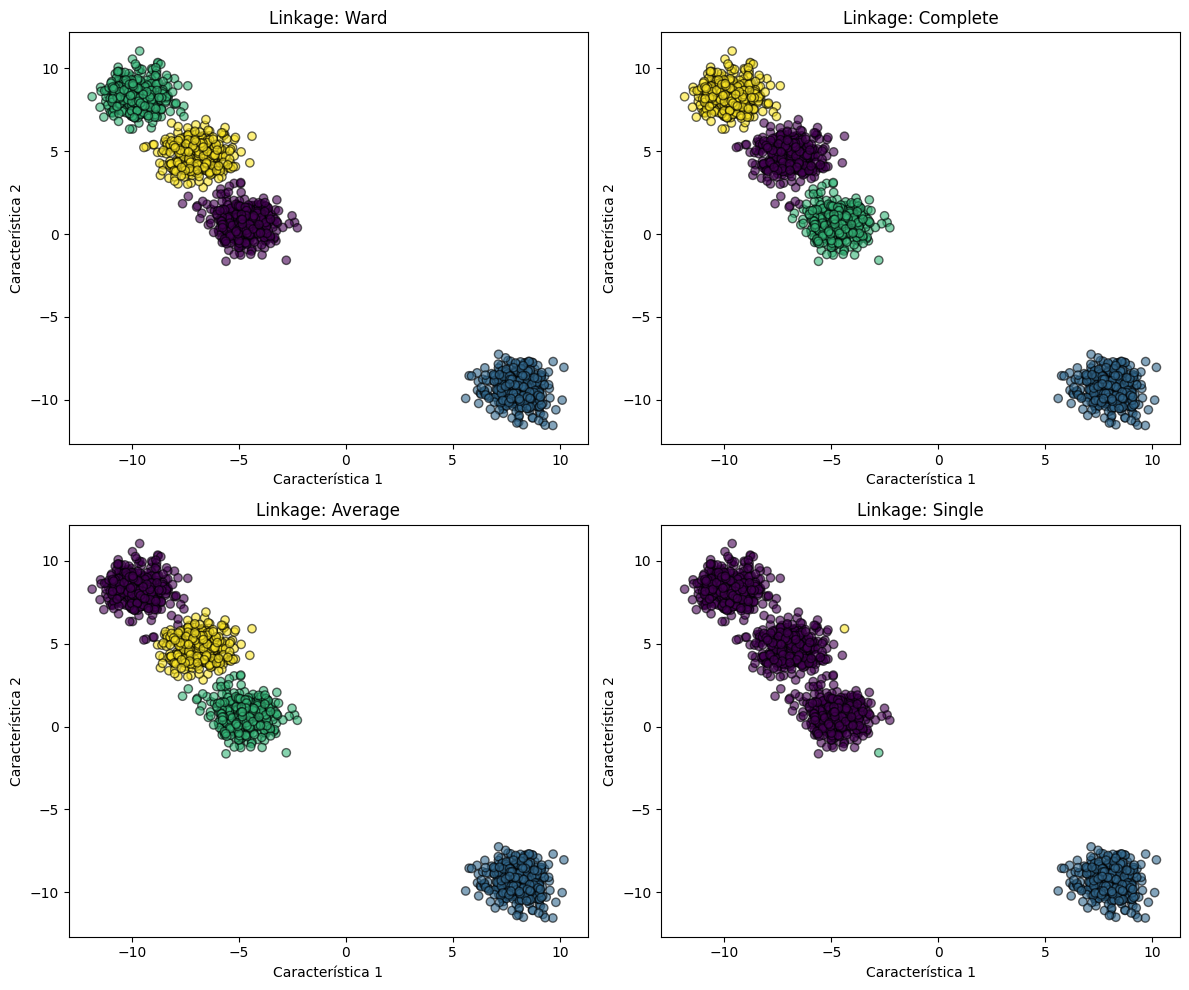

In [12]:
# Comparar diferentes métodos de enlace
linkage_methods = ['ward', 'complete', 'average', 'single']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, method in enumerate(linkage_methods):
    agg_clustering = AgglomerativeClustering(
        n_clusters=4,
        linkage=method
    )
    y_pred = agg_clustering.fit_predict(X)
    
    ax = axes[idx]
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.6, edgecolors='k')
    ax.set_title(f'Linkage: {method.capitalize()}')
    ax.set_xlabel('Característica 1')
    ax.set_ylabel('Característica 2')

plt.tight_layout()
plt.show()


#### Explicación del Código
1. **`linkage`** (de scipy): Calcula la matriz de enlace jerárquico
   - `method`: Método de enlace ('ward', 'single', 'complete', 'average')
   - Retorna matriz Z con información de fusiones

2. **`dendrogram`**: Visualiza la jerarquía de clusters
   - `truncate_mode`: Controla cómo truncar el dendrograma
   - `p`: Número de clusters a mostrar
   - `leaf_rotation`: Rotación de etiquetas

3. **`AgglomerativeClustering`**: Implementación sklearn de clustering jerárquico
   - `n_clusters`: Número de clusters para cortar el dendrograma
   - `linkage`: Método para calcular distancia entre clusters

#### Interpretación del Dendrograma
- **Altura vertical**: Distancia a la que se fusionan clusters
- **Hojas (abajo)**: Muestras individuales
- **Nodos internos**: Fusiones de clusters
- **Corte horizontal**: Determina número de clusters
- **Longitud de ramas**: Indica homogeneidad del cluster

### Notas de Examen sobre Clustering Jerárquico
- **Ventajas**:
  - No requiere especificar k a priori
  - Proporciona jerarquía completa (dendrograma)
  - Visualización intuitiva
  - Múltiples métricas de distancia disponibles

- **Desventajas**:
  - Computacionalmente costoso O(n³) o O(n² log n)
  - Sensible a noise y outliers
  - Decisiones de fusión son irreversibles

- **Métodos de linkage**:
  - **Ward**: Minimiza varianza intra-cluster (similar a K-Means)
  - **Single**: Sensible a outliers (encadenamiento)
  - **Complete**: Produce clusters compactos
  - **Average**: Compromiso entre single y complete


## *Spectral Clustering*

### Teoría
*Spectral Clustering* utiliza conceptos de teoría de grafos y álgebra lineal. Transforma los datos en un grafo de similitud y aplica clustering en el espacio de los eigenvectores de la matriz Laplaciana.

**Pasos del algoritmo**:
1. Construir matriz de similitud (grafo)
2. Calcular matriz Laplaciana
3. Calcular k menores eigenvectores
4. Aplicar K-Means en el espacio de eigenvectores

**Matriz Laplaciana**: $L = D - W$
donde:
- $W$: Matriz de adyacencia (similitudes)
- $D$: Matriz diagonal de grados $D_{ii} = \sum_j W_{ij}$

### Ejemplo

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.metrics import silhouette_score

# Generar datos no convexos (lunares)
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=42)

# Generar datos concéntricos
X_circles, y_circles = make_circles(n_samples=1000, 
                                    factor=0.5, 
                                    noise=0.05, 
                                    random_state=42)

# Generar datos esféricos
X_blobs, y_blobs = make_blobs(n_samples=1000, 
                              centers=3, 
                              cluster_std=1.0, 
                              random_state=42)

c:\Users\alber\projects\ttad_ml_project\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\alber\projects\ttad_ml_project\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


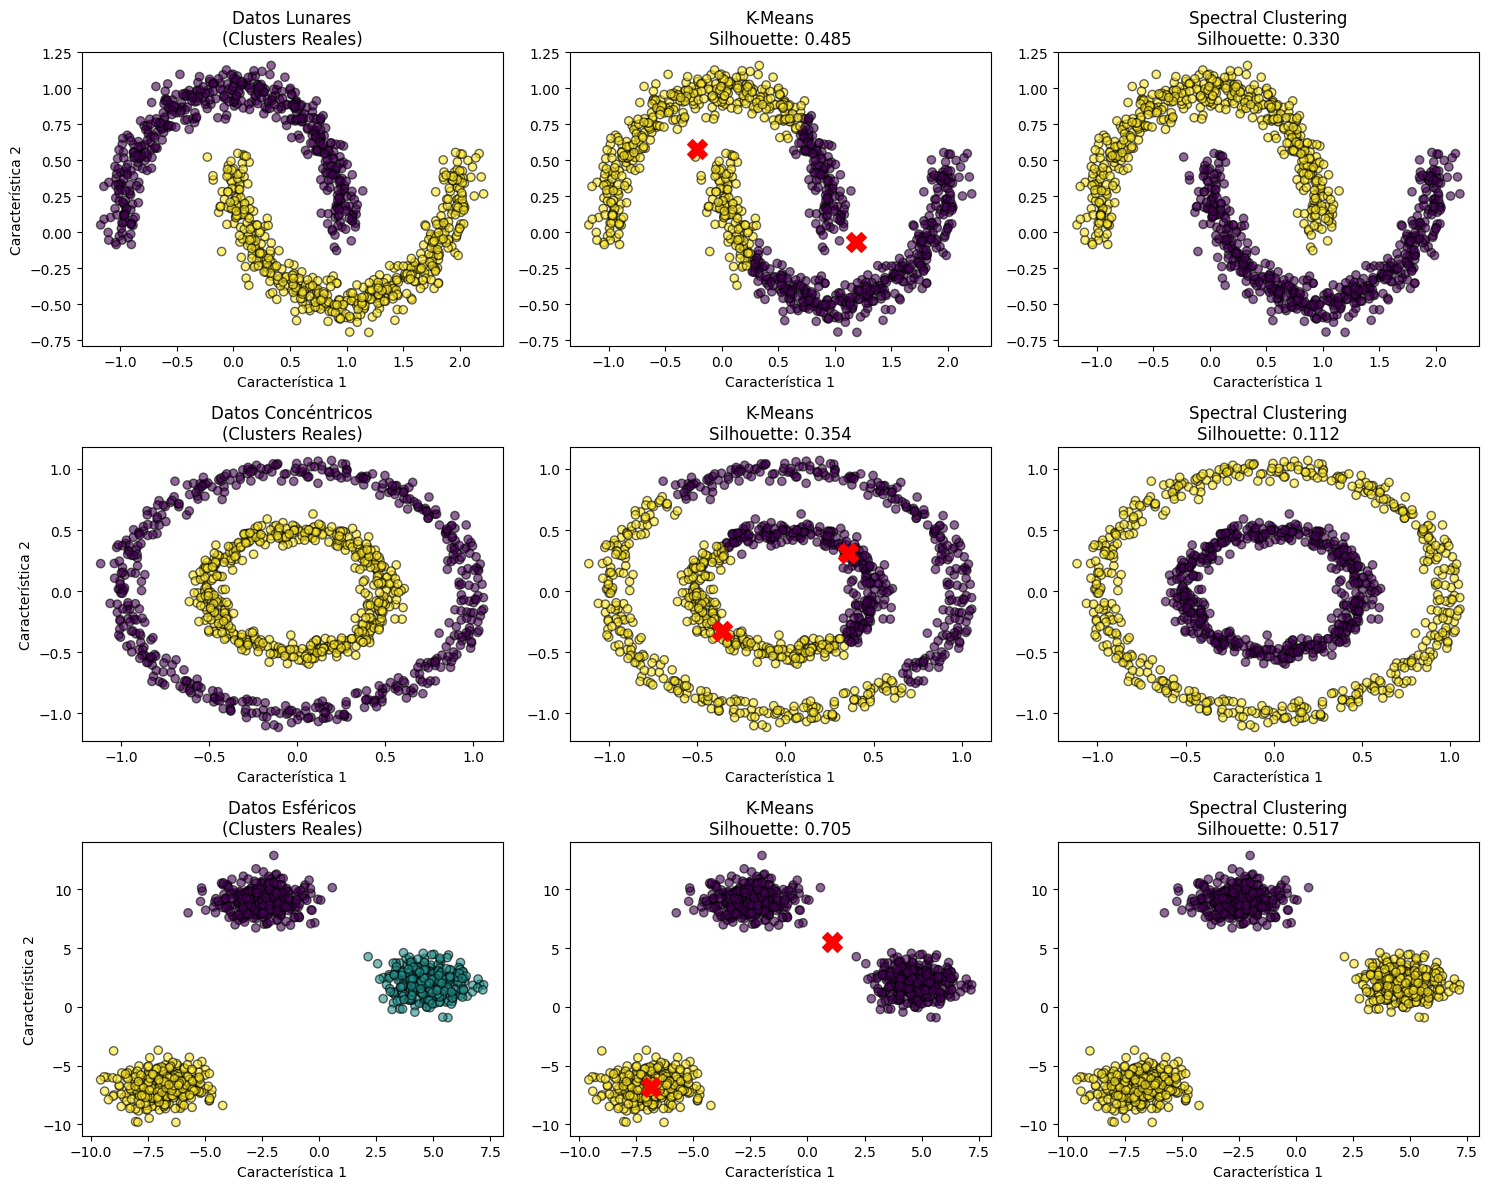

In [14]:
# Comparar K-Means vs Spectral Clustering
datasets = [
    (X_moons, y_moons, 'Datos Lunares'),
    (X_circles, y_circles, 'Datos Concéntricos'),
    (X_blobs, y_blobs, 'Datos Esféricos')
]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for row, (X, y_true, title) in enumerate(datasets):
    # K-Means
    kmeans = KMeans(n_clusters=2, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    
    # Spectral Clustering
    spectral = SpectralClustering(n_clusters=2, 
                                 assign_labels='discretize',
                                 random_state=42,
                                 affinity='nearest_neighbors',
                                 n_neighbors=10)
    y_spectral = spectral.fit_predict(X)
    
    # Calcular métricas
    sil_kmeans = silhouette_score(X, y_kmeans)
    sil_spectral = silhouette_score(X, y_spectral)
    
    # Visualizar
    axes[row, 0].scatter(X[:, 0], X[:, 1], c=y_true, alpha=0.6, edgecolors='k')
    axes[row, 0].set_title(f'{title}\n(Clusters Reales)')
    axes[row, 0].set_xlabel('Característica 1')
    axes[row, 0].set_ylabel('Característica 2')
    
    axes[row, 1].scatter(X[:, 0], X[:, 1], c=y_kmeans, alpha=0.6, edgecolors='k')
    axes[row, 1].scatter(kmeans.cluster_centers_[:, 0], 
                        kmeans.cluster_centers_[:, 1],
                        c='red', marker='X', s=200)
    axes[row, 1].set_title(f'K-Means\nSilhouette: {sil_kmeans:.3f}')
    axes[row, 1].set_xlabel('Característica 1')
    
    axes[row, 2].scatter(X[:, 0], X[:, 1], c=y_spectral, alpha=0.6, edgecolors='k')
    axes[row, 2].set_title(f'Spectral Clustering\nSilhouette: {sil_spectral:.3f}')
    axes[row, 2].set_xlabel('Característica 1')

plt.tight_layout()
plt.show()


c:\Users\alber\projects\ttad_ml_project\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\alber\projects\ttad_ml_project\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\alber\projects\ttad_ml_project\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


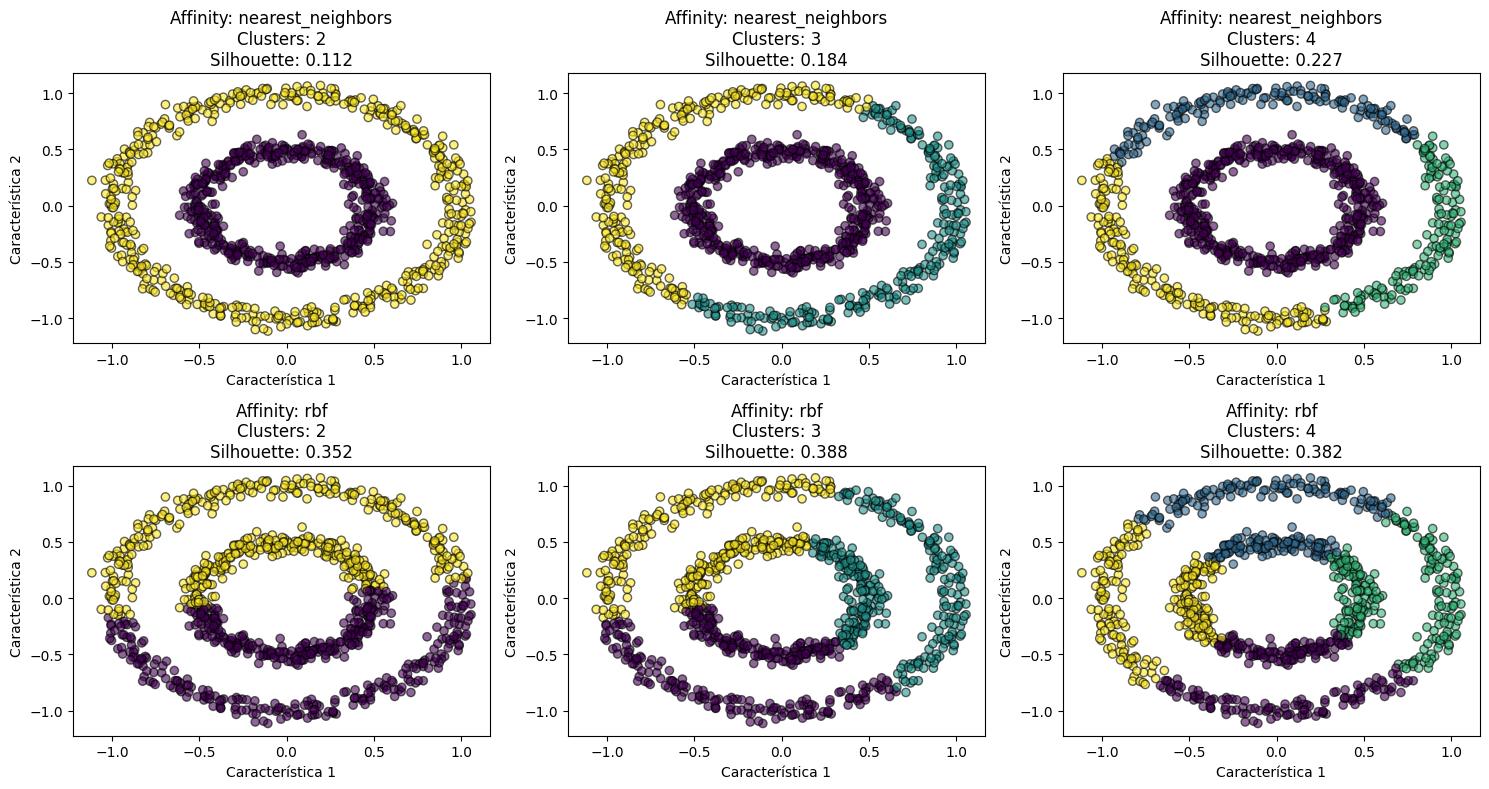

In [17]:
# Análisis de parámetros de Spectral Clustering
X, _ = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)

# Variar parámetros
affinities = ['nearest_neighbors', 'rbf']
n_clusters_range = [2, 3, 4]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

idx = 0
for affinity in affinities:
    for n_clusters in n_clusters_range:
        spectral = SpectralClustering(
            n_clusters=n_clusters,
            assign_labels='discretize',
            random_state=42,
            affinity=affinity,
            n_neighbors=10,
            gamma=1.0
        )
        y_pred = spectral.fit_predict(X)
        
        sil_score = silhouette_score(X, y_pred)
        
        ax = axes[idx]
        ax.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.6, edgecolors='k')
        ax.set_title(f'Affinity: {affinity}\nClusters: {n_clusters}\nSilhouette: {sil_score:.3f}')
        ax.set_xlabel('Característica 1')
        ax.set_ylabel('Característica 2')
        idx += 1

plt.tight_layout()
plt.show()


#### Explicación del Código
1. **`SpectralClustering`**: Implementa clustering espectral
   - `n_clusters`: Número de clusters
   - `affinity`: Método para construir matriz de similitud
   - `assign_labels`: Método para asignar etiquetas ('kmeans', 'discretize')
   - `n_neighbors`: Número de vecinos para affinity 'nearest_neighbors'
   - `gamma`: Parámetro para kernel RBF

2. **`silhouette_score`**: Evalúa calidad del clustering
   - Rango: [-1, 1]
   - Valores altos indican clusters bien separados
   - $s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$
     - $a(i)$: Distancia promedio intra-cluster
     - $b(i)$: Distancia promedio al cluster más cercano

#### Parámetros Clave de `SpectralClustering`
- **`affinity`**:
  - `'nearest_neighbors'`: Grafo k-NN
  - `'rbf'`: Kernel de base radial
  - `'precomputed'`: Matriz de similitud precalculada
- **`n_neighbors`**: Para affinity 'nearest_neighbors'
- **`gamma`**: Para affinity 'rbf' (controla influencia de puntos)
- **`assign_labels`**: `'kmeans'` o `'discretize'`

### Notas de Examen sobre Spectral Clustering
- **Ventajas**:
  - Captura clusters no convexos
  - Funciona bien con datos en estructuras de manifold
  - Basado en teoría sólida de grafos
  - Solo necesita matriz de similitud

- **Desventajas**:
  - Computacionalmente costoso para grandes datasets
  - Sensible a parámetros (especialmente gamma)
  - Requiere especificar número de clusters
  - Interpretación menos intuitiva

- **Aplicaciones típicas**:
  - Segmentación de imágenes
  - Agrupación de redes sociales
  - Datos con estructura de manifold

- **Complejidad**:
  - Construcción de grafo: O(n²) o O(n * k) para k-NN
  - Cálculo de eigenvectores: O(n³) para métodos exactos
  - Alternativas: Métodos aproximados para grandes datasets


## Métricas de Evaluación para Clustering

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import (silhouette_score, calinski_harabasz_score,
                           davies_bouldin_score, adjusted_rand_score,
                           normalized_mutual_info_score)
from sklearn.preprocessing import StandardScaler

# Generar datos con diferentes estructuras
X1, y1 = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)
X2, y2 = make_blobs(n_samples=500, centers=3, cluster_std=2.5, random_state=42)

# Normalizar datos
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
X2_scaled = scaler.fit_transform(X2)

In [21]:
# Aplicar diferentes algoritmos
algorithms = {
    'K-Means': KMeans(n_clusters=3, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.3, min_samples=10)
}

datasets = [
    (X1_scaled, y1, 'Datos Bien Separados'),
    (X2_scaled, y2, 'Datos Poco Separados')
]

In [23]:
# Evaluar cada combinación
results = []

for X, y_true, dataset_name in datasets:
    for algo_name, algorithm in algorithms.items():
        # Ajustar modelo (excepto para DBSCAN si no encuentra clusters)
        try:
            y_pred = algorithm.fit_predict(X)
            
            # Solo evaluar si hay más de un cluster
            n_clusters = len(np.unique(y_pred[y_pred != -1]))
            if n_clusters > 1:
                # Métricas internas (no necesitan etiquetas reales)
                sil_score = silhouette_score(X, y_pred)
                ch_score = calinski_harabasz_score(X, y_pred)
                db_score = davies_bouldin_score(X, y_pred)
                
                # Métricas externas (necesitan etiquetas reales)
                if len(np.unique(y_true)) == len(np.unique(y_pred[y_pred != -1])):
                    ari_score = adjusted_rand_score(y_true, y_pred)
                    nmi_score = normalized_mutual_info_score(y_true, y_pred)
                else:
                    ari_score = nmi_score = np.nan
                
                results.append({
                    'Dataset': dataset_name,
                    'Algoritmo': algo_name,
                    'Clusters': n_clusters,
                    'Silhouette': sil_score,
                    'Calinski-Harabasz': ch_score,
                    'Davies-Bouldin': db_score,
                    'ARI': ari_score,
                    'NMI': nmi_score
                })
        except:
            continue

In [24]:
# Mostrar resultados
import pandas as pd
results_df = pd.DataFrame(results)
print("Resultados de Evaluación de Clustering:")
print(results_df.to_string(index=False))

Resultados de Evaluación de Clustering:
             Dataset     Algoritmo  Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin      ARI      NMI
Datos Bien Separados       K-Means         3    0.843896        7612.165669        0.219151 1.000000 1.000000
Datos Bien Separados Agglomerative         3    0.843896        7612.165669        0.219151 1.000000 1.000000
Datos Bien Separados        DBSCAN         3    0.740293        5145.240090        0.257452 0.996997 0.994465
Datos Poco Separados       K-Means         3    0.619544        1267.903953        0.533171 0.935799 0.914026
Datos Poco Separados Agglomerative         3    0.619274        1265.792160        0.534163 0.935808 0.916191
Datos Poco Separados        DBSCAN         2    0.460862         304.664769        3.076280      NaN      NaN


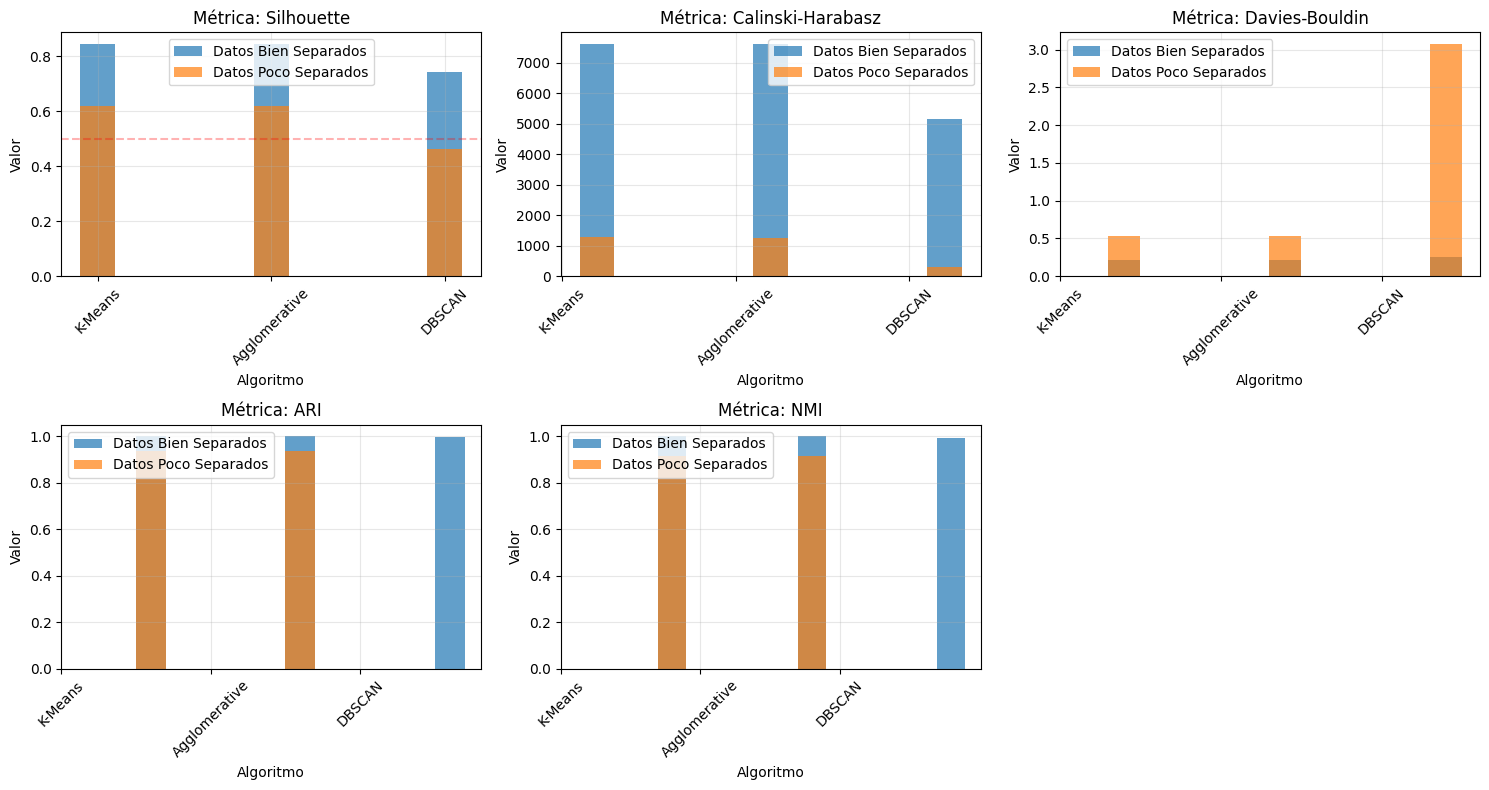

In [25]:
# Visualizar métricas
metrics = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin', 'ARI', 'NMI']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    if idx >= len(axes):
        break
        
    ax = axes[idx]
    
    for dataset_name in results_df['Dataset'].unique():
        subset = results_df[results_df['Dataset'] == dataset_name]
        x_pos = np.arange(len(subset))
        
        # Obtener valores (manejar NaN)
        values = subset[metric].fillna(0).values
        
        bars = ax.bar(x_pos + (idx * 0.2), values, width=0.2, 
                     label=f'{dataset_name}', alpha=0.7)
    
    ax.set_title(f'Métrica: {metric}')
    ax.set_xlabel('Algoritmo')
    ax.set_ylabel('Valor')
    ax.set_xticks(np.arange(len(algorithms)))
    ax.set_xticklabels(list(algorithms.keys()), rotation=45)
    
    # Línea de referencia para Silhouette (0.5 es generalmente bueno)
    if metric == 'Silhouette':
        ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.3)
    
    ax.legend()
    ax.grid(True, alpha=0.3)

# Ajustar layout
if len(metrics) < len(axes):
    for idx in range(len(metrics), len(axes)):
        axes[idx].axis('off')

plt.tight_layout()
plt.show()


In [26]:
# Interpretación de métricas
print("\n--- INTERPRETACIÓN DE MÉTRICAS ---")
print("""
Silhouette Score:
  • Rango: [-1, 1]
  • > 0.7: Estructura fuerte
  • 0.5-0.7: Estructura razonable
  • < 0.2: Sin estructura significativa
  • Negativo: Muestras asignadas incorrectamente

Calinski-Harabasz Score:
  • Ratio de varianza entre clusters / varianza intra-cluster
  • Valores más altos indican clusters mejor definidos
  • No tiene límite superior

Davies-Bouldin Score:
  • Promedio de similaridad entre clusters
  • Valores más bajos indican clusters mejor separados
  • Mínimo posible: 0

Adjusted Rand Index (ARI):
  • Rango: [-1, 1]
  • 1: Clusters idénticos
  • 0: Asignación aleatoria
  • Negativo: Peor que aleatorio

Normalized Mutual Information (NMI):
  • Rango: [0, 1]
  • 1: Información perfecta compartida
  • 0: Sin información compartida
""")



--- INTERPRETACIÓN DE MÉTRICAS ---

Silhouette Score:
  • Rango: [-1, 1]
  • > 0.7: Estructura fuerte
  • 0.5-0.7: Estructura razonable
  • < 0.2: Sin estructura significativa
  • Negativo: Muestras asignadas incorrectamente

Calinski-Harabasz Score:
  • Ratio de varianza entre clusters / varianza intra-cluster
  • Valores más altos indican clusters mejor definidos
  • No tiene límite superior

Davies-Bouldin Score:
  • Promedio de similaridad entre clusters
  • Valores más bajos indican clusters mejor separados
  • Mínimo posible: 0

Adjusted Rand Index (ARI):
  • Rango: [-1, 1]
  • 1: Clusters idénticos
  • 0: Asignación aleatoria
  • Negativo: Peor que aleatorio

Normalized Mutual Information (NMI):
  • Rango: [0, 1]
  • 1: Información perfecta compartida
  • 0: Sin información compartida



### Definiciones Matemáticas

1. **Silhouette Score**:
   $$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$
   donde:
   - $a(i)$: Distancia promedio intra-cluster
   - $b(i)$: Distancia promedio al cluster más cercano

2. **Calinski-Harabasz Score**:
   $$CH = \frac{\text{trace}(B_k)}{\text{trace}(W_k)} \times \frac{n - k}{k - 1}$$
   donde:
   - $B_k$: Matriz de dispersión entre clusters
   - $W_k$: Matriz de dispersión intra-cluster
   - $n$: Número de muestras
   - $k$: Número de clusters

3. **Davies-Bouldin Score**:
   $$DB = \frac{1}{k} \sum_{i=1}^k \max_{j \neq i} \left( \frac{s_i + s_j}{d(c_i, c_j)} \right)$$
   donde:
   - $s_i$: Dispersión promedio en cluster i
   - $d(c_i, c_j)$: Distancia entre centroides

4. **Adjusted Rand Index (ARI)**:
   $$ARI = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}$$
   donde RI es el Rand Index original

5. **Normalized Mutual Information (NMI)**:
   $$NMI = \frac{2 \times I(X;Y)}{H(X) + H(Y)}$$
   donde:
   - $I(X;Y)$: Información mutua
   - $H(X)$, $H(Y)$: Entropías

### Notas de Examen sobre Evaluación
- **Métricas internas**: No requieren etiquetas reales
  - Silhouette, Calinski-Harabasz, Davies-Bouldin
  - Útiles cuando no hay ground truth

- **Métricas externas**: Requieren etiquetas reales
  - ARI, NMI, Pureza, F-measure
  - Útiles para validar con datos etiquetados

- **Limitaciones**:
  - Métricas diferentes pueden dar resultados contradictorios
  - Sensibles a densidad y forma de clusters
  - Interpretación depende del contexto



## Preguntas Típicas de Examen

### Teóricas
1. **Comparar K-Means vs Spectral Clustering**
   - K-Means: Asume clusters convexos, basado en centroides
   - Spectral: Captura clusters no convexos, basado en grafos

2. **Explicar el método del codo**
   - Técnica para determinar k óptimo en K-Means
   - Graficar SSE vs k, buscar punto de inflexión
   - Limitaciones: No siempre hay codo claro

3. **Interpretar un dendrograma**
   - Altura indica distancia de fusión
   - Hojas son muestras individuales
   - Corte horizontal determina número de clusters

### Prácticas
1. **Calcular SSE dado un clustering**
   $$SSE = \sum_{i=1}^k \sum_{x \in C_i} ||x - \mu_i||^2$$

2. **Determinar k óptimo usando método del codo**

3. **Interpretar métricas de evaluación**
   - Silhouette > 0.5: Buen clustering
   - Davies-Bouldin bajo: Clusters bien separados

4. **Seleccionar algoritmo según tipo de datos**
   - Datos esféricos: K-Means
   - Datos no convexos: Spectral, DBSCAN
   - Jerarquía deseada: Agglomerative

### Ejercicio de Cálculo
Dado un conjunto de puntos y centroides:
- Puntos: (1,2), (1,4), (1,0), (10,2), (10,4), (10,0)
- Centroides iniciales: (1,2), (10,2)
- Calcular una iteración de K-Means:

**Solución**:
1. Asignar puntos:
   - Cluster 1: (1,2), (1,4), (1,0) → Distancia a (1,2): 0, 2, 2
   - Cluster 2: (10,2), (10,4), (10,0) → Distancia a (10,2): 0, 2, 2
2. Recalcular centroides:
   - μ₁ = ((1+1+1)/3, (2+4+0)/3) = (1, 2)
   - μ₂ = ((10+10+10)/3, (2+4+0)/3) = (10, 2)
3. SSE = 0²+2²+2² + 0²+2²+2² = 0+4+4 + 0+4+4 = 16
